mini project

In [66]:
import pandas as pd
import numpy as np
# read in the csv file
airline_df = pd.read_csv('https://raw.githubusercontent.com/wangrenfeng0/Machine-Learning-I/main/airline_passenger_satisfaction.csv') 

if 'Unnamed: 0' in airline_df:
    del airline_df['Unnamed: 0']

airline_df = airline_df.dropna()

In [68]:
airline_df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [60]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   customer_type                      129487 non-null  object 
 2   age                                129487 non-null  int64  
 3   type_of_travel                     129487 non-null  object 
 4   customer_class                     129487 non-null  object 
 5   flight_distance                    129487 non-null  int64  
 6   inflight_wifi_service              129487 non-null  int64  
 7   departure_arrival_time_convenient  129487 non-null  int64  
 8   ease_of_online_booking             129487 non-null  int64  
 9   gate_location                      129487 non-null  int64  
 10  food_and_drink                     129487 non-null  int64  
 11  online_boarding                    1294

The code below shows the breakout of the categorical variables, the only non binary variable is customer class.  As such this variable will be split into seperate columns via OneHotEncoding.  The other binary variables (Gender, customer_type, type of travel, and satisfaction) will be converted to an integar.

In [61]:
airline_df[['Gender','customer_type','type_of_travel','customer_class','satisfaction']].describe()

,Gender,customer_type,type_of_travel,customer_class,satisfaction
count,129487,129487,129487,129487,129487
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65703,105773,89445,61990,73225


In [69]:
airline_df['Is_Female'] = airline_df.Gender=='Female' 
airline_df.Is_Female = airline_df.Is_Female.astype(int)

airline_df['Is_LoyalCustomer'] = airline_df.customer_type=='LoyalCustomer' 
airline_df.Is_LoyalCustomer = airline_df.Is_LoyalCustomer.astype(int)

airline_df['Is_Businesstravel'] = airline_df.type_of_travel=='Business travel' 
airline_df.Is_Businesstravel = airline_df.Is_Businesstravel.astype(int)

airline_df['Is_dissatisfied'] = airline_df.satisfaction=='neutral or dissatisfied' 
airline_df.Is_dissatisfied = airline_df.Is_dissatisfied.astype(int)

customer_class_tmp_df = pd.get_dummies(airline_df.customer_class,prefix='customer_class')
airline_df = pd.concat((airline_df,customer_class_tmp_df),axis=1)

A quick histogram of the continuious variables age, flight distance, departure_delay and arrival delay shows how they are distributed and any skewness.  From this we can determine how to best provide integar substitutes for the variables.  Because the vast majority of records have no delay, delays will be cut into 3 groups: 0 min delay, delay between 1-500 mins, 500 mins+

Age and flight distance appear to be much more normally distributed than flight delay, as such they will be cut into 4 variables.

array([<AxesSubplot:title={'center':'age'}>,
       <AxesSubplot:title={'center':'flight_distance'}>,
       <AxesSubplot:title={'center':'departure_delay_in_minutes'}>,
       <AxesSubplot:title={'center':'arrival_delay_in_minutes'}>],
      dtype=object)

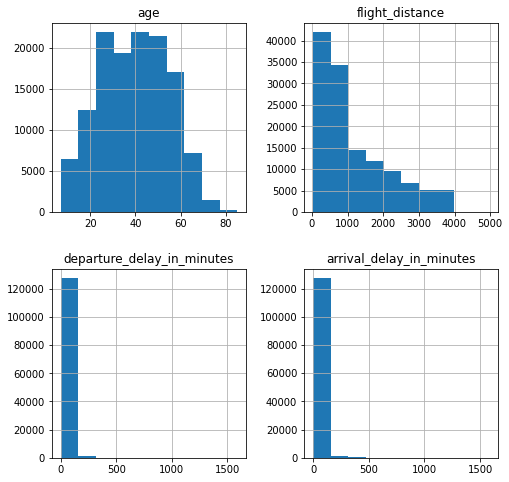

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(2,2,figsize=(8, 8))
airline_df[['age','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes']].hist(ax=axis)

In [71]:
airline_df['age_range'] = pd.cut(airline_df.age,[0,16,24,65,1e6],4,labels=[0,1,2,3]) # this creates a new variable

airline_df['flight_distance_range'] = pd.cut(airline_df.flight_distance,[0,500,1500,3000,1e9],4,labels=[0,1,2,3]) # this creates a new variable

airline_df['departure_delay_in_minutes_range'] = pd.cut(airline_df.departure_delay_in_minutes,[-1,0,500,1e11],3,labels=[0,1,2]) # this creates a new variable

airline_df['arrival_delay_in_minutes_range'] = pd.cut(airline_df.arrival_delay_in_minutes,[-1,0,500,1e11],3,labels=[0,1,2]) # this creates a new variable







select transformed variables

In [74]:
airline_df2 = airline_df[['Is_Female','Is_LoyalCustomer','age_range','Is_Businesstravel',
            'customer_class_Business','customer_class_Eco','customer_class_Eco Plus',
           'flight_distance_range','inflight_wifi_service','departure_arrival_time_convenient','gate_location',
                    'food_and_drink','online_boarding','seat_comfort','inflight_entertainment',
                    'onboard_service',  'leg_room_service' ,'baggage_handling' ,'checkin_service' ,  
                     'inflight_service','cleanliness','departure_delay_in_minutes_range',
                    'arrival_delay_in_minutes_range','Is_dissatisfied']]

Training and Test Split

In [75]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'Is_dissatisfied' in airline_df2:
    y = airline_df2['Is_dissatisfied'].values # get the labels we want
    del airline_df2['Is_dissatisfied'] # get rid of the class label
    X = airline_df2.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [79]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    cm1=conf
    total1=sum(sum(cm1))
    
    
    
    
    
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Sensitivity', sensitivity1 )

    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Specificity', specificity1)

    
    
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time
















====Iteration 0  ====
accuracy 0.8590624758668624
Sensitivity 0.822708277762959
Specificity 0.8869701726844584
confusion matrix
 [[ 9253  1994]
 [ 1656 12995]]
====Iteration 1  ====
accuracy 0.8580585373387907
Sensitivity 0.8201878766394896
Specificity 0.8872998494594224
confusion matrix
 [[ 9255  2029]
 [ 1647 12967]]
====Iteration 2  ====
accuracy 0.8570932118310294
Sensitivity 0.8193633952254642
Specificity 0.8863449410474362
confusion matrix
 [[ 9267  2043]
 [ 1658 12930]]
